In [16]:
import boto3
import bson
from bson.json_util import dumps, loads
import json

from PIL import Image
import PIL
from io import BytesIO

In [2]:
s3 = boto3.resource('s3')
client = boto3.client('s3')

In [3]:
bucket = s3.Bucket('31b179a9-539e-4d1d-9686-3136fe76b662')

In [4]:
prefix = 'offers_bson_new/'
list_files_in_offers_list = [i.key[len(prefix):] for i in bucket.objects.filter(Prefix=prefix)]


In [5]:
len(list_files_in_offers_list)

3353

In [6]:
file = client.get_object(Bucket='31b179a9-539e-4d1d-9686-3136fe76b662', Key=prefix+list_files_in_offers_list[1])['Body'].read()


In [7]:
d=bson.BSON.decode(loads(file))

In [8]:
d.keys()

dict_keys(['flat_size', 'gallery', 'img_cover_title', 'issued_by', 'location', 'offer_id', 'offer_title', 'price', 'price_per_square', 'rooms', 'tracking_id', 'type', 'url', 'url_offer_list', 'producer_name', 'main_url', 'offer_type', 'name', 'price_m2', 'market', 'building_type', 'floor', 'number_of_floors', 'building_material', 'widows_type', 'heating_type', 'year_of_building', 'finishing_stage', 'rent_price', 'property_form', 'available_from', 'description', 'additional_info', 'agency_tracking_id', 'add_rel_date', 'update_rel_date', 'download_date', 'geo_coordinates', 'geo_address_text', 'geo_address_coordin', 'img_gallery_strimg'])

In [9]:
def open_img_from_str(str_img):
    try:
        return Image.open(BytesIO(str_img))
    except BaseException:
        return None

In [10]:
d['url']

'https://www.otodom.pl/oferta/mieszkanie-72-m-warszawa-ID1vwHF.html#df72cb01b2'

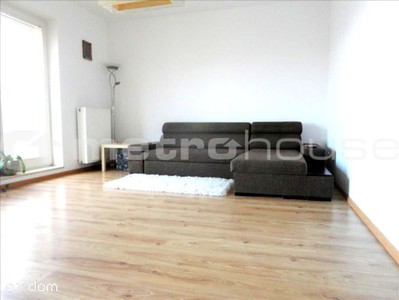

In [11]:
open_img_from_str(d['img_gallery_strimg'][0])

In [13]:
data_b_ = dumps(bson.BSON.encode(d))

In [17]:
with open("X.bson",'w') as f:
    f.write(data_b_)

In [18]:
with open("X.bson","r") as f:
    x=f.read()